In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.preprocessing
from sklearn import linear_model, ensemble, neural_network
from sklearn.svm import SVC
import scipy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import itertools

In [3]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    tion can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_model_results(target_one_hot, pred_class_scores):
    pred = pred_class_scores.argmax(axis=1)
    targ = target_one_hot.argmax(axis=1)
    acc =sklearn.metrics.accuracy_score(targ, pred)
    loss = sklearn.metrics.log_loss(target_one_hot, pred_class_scores)
    print("Accu:", acc)
    print("LogLoss:", loss)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(targ, pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=[str(handval) for handval in range(10)],
                          title='Confusion', normalize=True)
    
    return (acc, loss)

In [4]:
DATAPATH = 'data/'
TRAIN = 'poker-hand-training-true.data'
TEST = 'poker-hand-testing.data'

In [5]:
header_in = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5']
header_class = ['CLASS']
print(header_in+header_class)

['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']


In [6]:
train_frame = pd.read_csv(DATAPATH+TRAIN, sep=',', names=header_in+header_class)
test_frame = pd.read_csv(DATAPATH+TEST, sep=',', names=header_in+header_class)

In [7]:
# training data
train_frame.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [8]:
# testing data
test_frame.head(5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


# Lets dig in to the data

In [9]:
train_frame.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


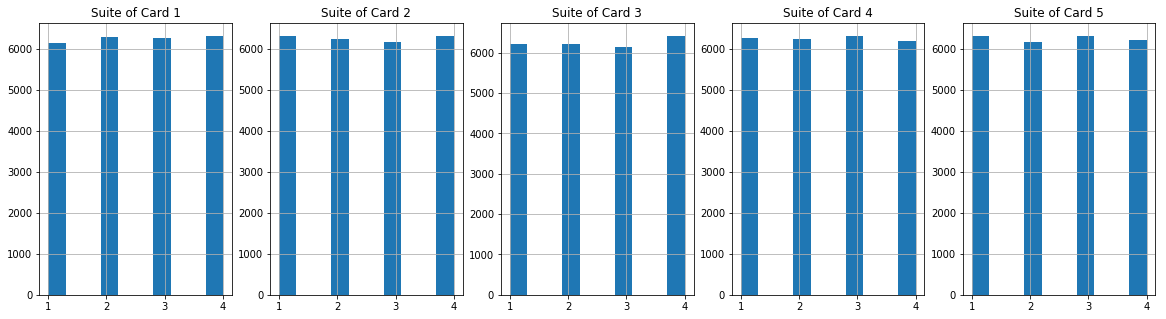

In [10]:
# stealing Chris Lavers format for plotting the data
for i in range(1, 6):
    plt.subplot(1,5,i)
    train_frame['S{0}'.format(i)].hist(figsize=(20,5))
    plt.title('Suite of Card {0}'.format(i))

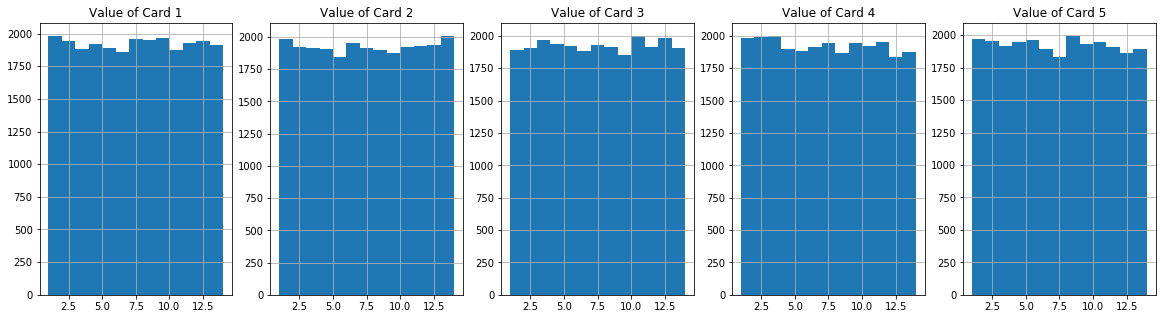

In [11]:
for i in range(1, 6):
    plt.subplot(1,5,i)
    train_frame['C{0}'.format(i)].hist(figsize=(20,5), bins=range(1,15))
    plt.title('Value of Card {0}'.format(i))

Text(0.5,1,'Hand class distribution')

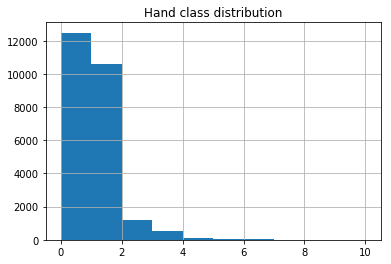

In [12]:
train_frame['CLASS'].hist(bins=range(11))
plt.title('Hand class distribution')

In [13]:
# get training data and labels, as numpy arrays
train_labels = train_frame['CLASS'].values
train_inputs = train_frame[header_in].values

# same for testing
test_labels = test_frame['CLASS'].values
test_inputs = test_frame[header_in].values

In [14]:
# discrete classification, lets one-hot the labels
training_y_one_hot = sklearn.preprocessing.OneHotEncoder().fit_transform(train_labels.reshape(-1,1)).todense()
testing_y_one_hot = sklearn.preprocessing.OneHotEncoder().fit_transform(test_labels.reshape(-1,1)).todense()

In [15]:
print(train_labels.shape, train_inputs.shape)

(25010,) (25010, 10)


Accu: 0.613977
LogLoss: 0.885044648821
Normalized confusion matrix


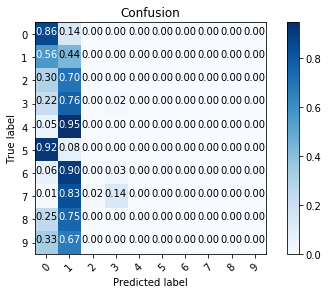

(0.61397699999999999, 0.88504464882081468)

In [18]:
GBC = ensemble.GradientBoostingClassifier()
GBC.fit(train_inputs, train_labels)
plot_model_results(testing_y_one_hot, GBC.predict_proba(test_inputs))

Accu: 0.850704
LogLoss: 0.3701542207997954
Normalized confusion matrix


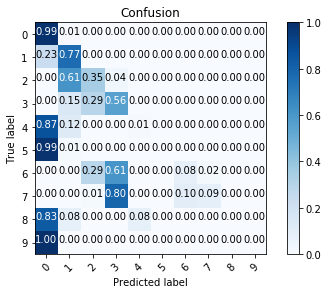

(0.850704, 0.3701542207997954)

In [16]:
base_nn = neural_network.MLPClassifier(hidden_layer_sizes=(32, 64, 32))
base_nn.fit(train_inputs, train_labels)
plot_model_results(testing_y_one_hot, base_nn.predict_proba(test_inputs))
# 91% accuracy from an out of the box model! No work required!
#
# Lets walk over some different layer architectures

Accu: 0.967675
LogLoss: 0.10760443861
Normalized confusion matrix


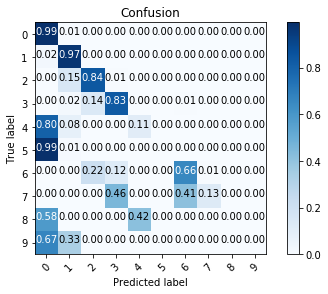

(0.96767499999999995, 0.10760443860991921)

In [26]:
base_nn = neural_network.MLPClassifier(hidden_layer_sizes=(100,200, 200,100))
base_nn.fit(train_inputs, train_labels)
plot_model_results(testing_y_one_hot, base_nn.predict_proba(test_inputs))

## Clearly we can't keep adding layers and expect to see better results after a certain point
### Despite learning the representation for the lower 4 classes fairly well, the MLP is not able to extract a meaningful generalization of the upper classes.

One observation is that we arent learning some of the more complex patterns of ordering, and suit is not being considered in the case of flushes. How can we encode this better? 

Lets take our (suit, value) pairs and binarize them! Cards are unique, only ever appearing once per hand, so each record will become a 52 length bit string, plus the class

In [14]:
def get_card_indexs(row):
    hand = np.zeros(52)
    for i in range(1,6):
        s = 0 + (2 * (i-1))
        c = s + 1
        ind = (row[s]-1) * 13
        ind = ind + (row[c]-1)
        hand[ind] = 1
    return hand
        

In [97]:
hothand_train = np.apply_along_axis(get_card_indexs, -1, train_inputs)
hothand_test = np.apply_along_axis(get_card_indexs, -1, test_inputs)

Accu: 0.979095
LogLoss: 0.08307286058210629
Normalized confusion matrix


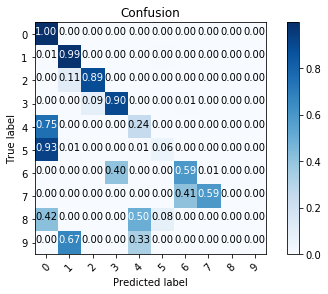

(0.979095, 0.08307286058210629)

In [90]:
base_nn = neural_network.MLPClassifier(hidden_layer_sizes=(100,200, 200,100))
base_nn.fit(hothand_train, train_labels)
plot_model_results(testing_y_one_hot, base_nn.predict_proba(hothand_test))

## Just by flattening the hand, we see a jump in performance for the same architecture!
### Perhaps we should also provide some explicit features counting the occurances of a value or suit, and the difference of sorted adjacent cards

In [217]:
def flatten_hand(row):
    hand = np.zeros(52)
    val_count = np.zeros(13)
    suit_count = np.zeros(4)
    vals = []
    valdiff = []
    for i in range(1,6):
        s = 0 + (2 * (i-1))
        c = s + 1
        ind = (row[s]-1) * 13
        ind = ind + (row[c]-1)
        hand[ind] = 1
        val_count[row[c]-1] += 1
        suit_count[row[s]-1] += 1
        vals.append(row[c])
    vals.sort()
    for i in range(0,4):
        valdiff.append(vals[i] - vals[i+1])
    valdiff.append(vals[0] - vals[-1])
    sc = 0
    for i in suit_count:
        if i != 0:
            sc = sc+1
    return np.hstack((hand, val_count, suit_count, valdiff, [sc], np.var(vals)))

In [218]:
hothand_train_count = np.apply_along_axis(flatten_hand, -1, train_inputs)
hothand_test_count = np.apply_along_axis(flatten_hand, -1, test_inputs)

fitting
scoring
Accu: 0.998767
LogLoss: 0.0034133143066017633
Normalized confusion matrix


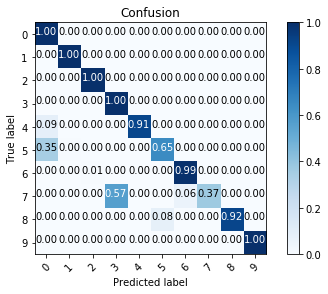

(0.998767, 0.0034133143066017633)

In [180]:
base_nn = neural_network.MLPClassifier(hidden_layer_sizes=(28, 64, 28))
print("fitting")
base_nn.fit(hothand_train_count, train_labels)
print("scoring")
plot_model_results(testing_y_one_hot, base_nn.predict_proba(hothand_test_count))

In [159]:
from sklearn import tree

Accu: 0.999913
LogLoss: 0.0030048735463664425
Normalized confusion matrix


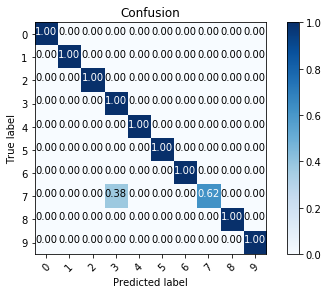

(0.999913, 0.0030048735463664425)

In [221]:
dt = tree.DecisionTreeClassifier()

dt.fit(hothand_train_count, train_labels)

plot_model_results(testing_y_one_hot, np.eye(10)[dt.predict(hothand_test_count)])

In [222]:
scores = cross_val_score(dt, hothand_test_count, test_labels, cv=3)

In [223]:
scores

array([1., 1., 1.])